<h1>Machine Learning - Classification</h1>

<h2>MNIST </h2>

In [1]:
from sklearn.datasets import fetch_openml
mnist=fetch_openml('mnist_784',version=1)
mnist

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixel49',
  'pixel50',
  'pixel51',
  '

In [2]:
mnist.keys()


dict_keys(['data', 'target', 'feature_names', 'DESCR', 'details', 'categories', 'url'])

<p>
A DESCR key describing the dataset.<br>
A data key containing an array with one row per instance and one column per
feature.<br>
A target key containing an array with the labels.<br></p>

In [3]:
X,y=mnist['data'],mnist['target']
print(X.shape,'\n',y.shape)

(70000, 784) 
 (70000,)


In [4]:
import matplotlib
import matplotlib.pyplot as plt
digit=X[4587]
digit_image=digit.reshape(28,28)
plt.axis('on')
plt.imshow(digit_image,cmap=matplotlib.cm.binary,interpolation='nearest')




In [5]:
y[4587]

'6'

<h1 align='center'> Binary Classfier </h1>


<p><b>Binary or binomial classification is the task of classifying the elements of a given set into two groups (predicting which group each one belongs to) on the basis of a classification rule</b>. 

Pass or Fail<br>
Zero or One<br>
Positive or Negative</p>


In [6]:
import numpy as np
type(y)


numpy.ndarray

In [7]:
type(y[0])

str

In [8]:

y=y.astype(np.uint8)
type(y)


numpy.ndarray

In [9]:
type(y[0])

numpy.uint8

In [10]:
X_train,X_test,y_train,y_test=X[:60000],X[60000:],y[:60000],y[60000:]

In [11]:
y_test.shape

(10000,)

In [12]:
y_train_6=(y_train==6)
y_test_6=(y_test==6)

In [13]:
np.unique(y_train_6)

array([False,  True])

In [14]:
from sklearn.linear_model import SGDClassifier

sgd_clf=SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_6)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [15]:
some_digit=X[5897]  # 4587 is 6  and 5897 is 7
some_digit_actual=y[5897]
some_digit_actual

7

In [16]:
sgd_clf.predict([some_digit])

array([False])

<h1 align="center">Confusion Matrix</h1><p>A confusion matrix is a summary of prediction results on a classification problem.<br>The number of correct and incorrect predictions are summarized with count values and broken down by each class.<br>Reference: https://www.geeksforgeeks.org/confusion-matrix-machine-learning/<br></p>
<img src="images\cm.png">

In [17]:
from sklearn.model_selection import cross_val_predict
y_pred=cross_val_predict(sgd_clf,X_train,y_train_6,cv=3)

In [18]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_6,y_pred)

array([[52957,  1125],
       [  446,  5472]], dtype=int64)

In [19]:
from sklearn.metrics import precision_score,recall_score
precision_score(y_train_6,y_pred)

0.8294679399727148

In [20]:
recall_score(y_train_6,y_pred)

0.9246367015883744

In [21]:
from sklearn.metrics import f1_score
f1_score(y_train_6,y_pred)

0.8744706352377146

<h1>ROC and AUC</h1>

<p>Scikit-Learn does not let you set the threshold directly, but it does give you access to
the decision scores that it uses to make predictions. Instead of calling the classifier’s
predict() method, you can call its decision_function() method, which returns a
score for each instance, and then make predictions based on those scores using any
threshold you want</p>

In [22]:
y_scores=sgd_clf.decision_function([X[4587]])
y_scores

array([6985.85526459])

In [23]:
y[4587]

6

In [24]:
y_someDigit_pred=(y_scores> 7000)
y_someDigit_pred

array([False])

In [25]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_6, cv=3,
method="decision_function")

In [26]:
from sklearn.metrics import roc_curve

fpr,tpr, thrsh = roc_curve(y_train_6, y_scores)

In [27]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, linewidth=2)
    plt.plot([0, 1], [0, 1], 'k--') 
    plt.xlabel('False Postive rate (1-Specificity)')
    plt.ylabel('True Postive rate (Sensitivity)')


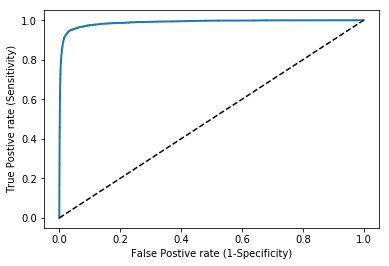

In [28]:
plot_roc_curve(fpr,tpr)
plt.show()

In [29]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_6, y_scores)

0.98853069661194

<h1> One versus All - Multiclass Classification </h1>

In [67]:

from sklearn.linear_model import SGDClassifier

sgd_clf=SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train)
sgd_clf.predict([X[4587]])

array([6], dtype=uint8)

In [68]:
sgd_clf.predict([X[4587],X[4588],X[4589],X[4590]])

array([6, 0, 9, 5], dtype=uint8)

In [76]:
y[4587],y[4588],y[4589],y[4590]

(6, 0, 9, 5)

In [70]:
some_digit_scores = sgd_clf.decision_function([X[4589]])

In [71]:
some_digit_scores

array([[-39011.82314391, -33768.3748506 , -21723.01003622,
         -2180.19154271, -10787.23637288,  -5315.50742556,
        -37329.1011291 ,  -9072.8869749 ,  -1552.15674718,
          1956.14539675]])

In [72]:
np.argmax(some_digit_scores)

9

In [73]:
sgd_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [74]:
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5547,    1,   71,   30,    7,   57,   61,   10,   92,   47],
       [   3, 6297,  198,   32,   10,   25,   16,   25,  107,   29],
       [  28,   41, 5315,  122,   47,   28,  104,  101,  142,   30],
       [   9,   19,  286, 5094,   15,  290,   35,   82,  125,  176],
       [   6,   21,   71,   35, 5241,   15,   49,   54,   66,  284],
       [  45,   15,   78,  400,   88, 4212,  141,   34,  272,  136],
       [  21,   10,   80,    9,   37,   92, 5593,    2,   64,   10],
       [  18,   18,   71,   29,   73,   11,    5, 5821,   18,  201],
       [  29,  114,  179,  273,   59,  254,   59,   61, 4573,  250],
       [  15,   14,   49,  137,  194,   45,    1,  552,   75, 4867]],
      dtype=int64)

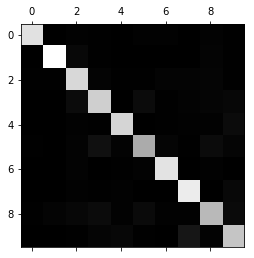

In [75]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

<h3> Reference:<h4>Hands-on Machine Learning with Scikit-Learn, Keras,
    and TensorFlow Concepts, Tools, <br> and Techniques to Build Intelligent Systems<br>
    <img src="images/mlbook.gif"></h4><h3>-Aurélien Géron</h3>

<h2 align="center"> Thanks and have a great day !</h2>